In [1]:
#Using LSTM to predict closing price of Tesla stock using data from the last 60 days.

In [2]:
#Import libraries
import math
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

2023-06-29 13:07:31.727061: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-29 13:07:35.339394: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-29 13:07:35.346743: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-29 13:07:41.452620: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [9]:
#Get TSLA quote
df = yf.download('TSLA', start='2016-01-01', end='2023-06-01')
#Show the data
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,15.381333,15.425333,14.600000,14.894000,14.894000,102406500
2016-01-05,15.090667,15.126000,14.666667,14.895333,14.895333,47802000
2016-01-06,14.666667,14.670000,14.398667,14.602667,14.602667,56686500
2016-01-07,14.279333,14.562667,14.244667,14.376667,14.376667,53314500
2016-01-08,14.524000,14.696000,14.051333,14.066667,14.066667,54421500
...,...,...,...,...,...,...
2023-05-24,182.229996,184.220001,178.220001,182.899994,182.899994,137605100
2023-05-25,186.539993,186.779999,180.580002,184.470001,184.470001,96870700
2023-05-26,184.619995,198.600006,184.529999,193.169998,193.169998,162061500


In [10]:
#Get rows and columns in dataset
df.shape

(1865, 6)

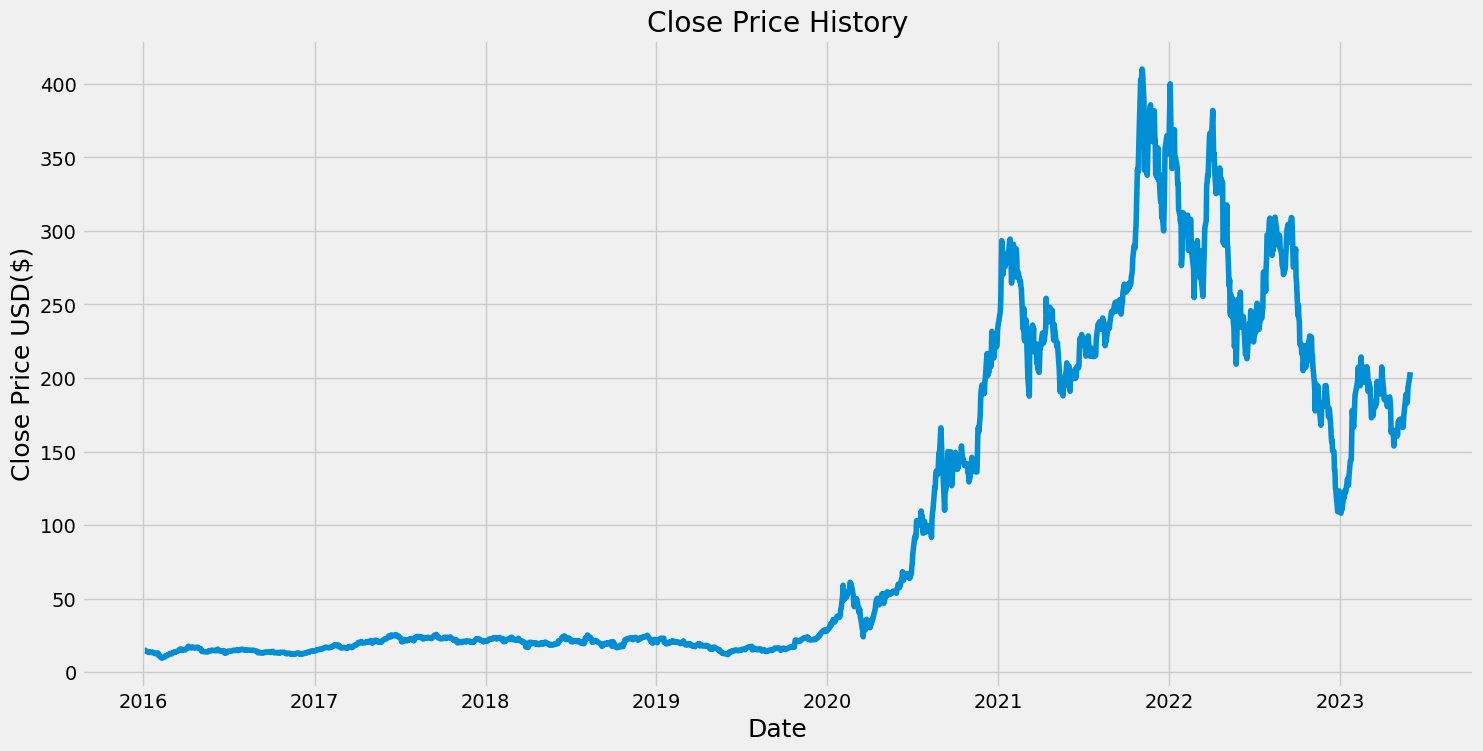

In [11]:
#Visualise closing data history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD($)', fontsize=18)
plt.show()

In [12]:
#Create new df with close data only
data = df.filter(['Close'])
#DF to numpy array
dataset = data.values
#Get number of rows to train model on
training_data_len = math.ceil(len(dataset) * .8)
print(training_data_len)

1492


In [13]:
#Scale data
scaler = MinMaxScaler(feature_range=(0,1))
#Transform data
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.01327699],
       [0.01328032],
       [0.01254937],
       ...,
       [0.45853063],
       [0.47848609],
       [0.48540428]])

In [14]:
#Create training set
#Create scaled training data set
train_data = scaled_data[0:training_data_len, :]
#Split data into x_train and y_train 
x_train = []
y_train = []

for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

In [15]:
#convert x+y_train to numpy array
x_train, y_train = np.array(x_train), np.array(y_train)

In [16]:
#Reshape x_train data
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1], 1))
x_train.shape

(1432, 60, 1)

In [17]:
#Build LSTM 
model = Sequential()
model.add(LSTM(50, return_sequences=True,input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

2023-06-29 13:08:29.475536: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-29 13:08:29.476597: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-29 13:08:29.477191: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [18]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [93]:
#Training our model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1432/1432 [==============================] - 15s 10ms/step - loss: 5.8000e-04


In [94]:
#Create the testing dataset
#Create array with scaled values from index 1432 to 972
test_data = scaled_data[training_data_len-60:, :]
#Create the dat sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    


In [95]:
#Convert data to numpy array
x_test = np.asarray(x_test)
x_test

array([[0.58903609, 0.59463893, 0.59587936, ..., 0.88768507, 0.87902686,
        0.82105869],
       [0.59463893, 0.59587936, 0.60532011, ..., 0.87902686, 0.82105869,
        0.8160969 ],
       [0.59587936, 0.60532011, 0.60628584, ..., 0.82105869, 0.8160969 ,
        0.85167871],
       ...,
       [0.45286118, 0.47006931, 0.46012907, ..., 0.44004876, 0.43288076,
        0.43680194],
       [0.47006931, 0.46012907, 0.44489402, ..., 0.43288076, 0.43680194,
        0.45853063],
       [0.46012907, 0.44489402, 0.43063298, ..., 0.43680194, 0.45853063,
        0.47848609]])

In [96]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1] ,1))

In [97]:
#Get models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
predictions

12/12 [==============================] - 0s 5ms/step


array([[353.15475 ],
       [344.33606 ],
       [342.2545  ],
       [344.2313  ],
       [340.8434  ],
       [338.4887  ],
       [332.37228 ],
       [326.4229  ],
       [323.84872 ],
       [318.449   ],
       [314.5255  ],
       [309.1474  ],
       [308.54593 ],
       [315.89185 ],
       [328.7731  ],
       [342.03458 ],
       [350.97736 ],
       [355.76114 ],
       [356.2562  ],
       [353.9428  ],
       [364.84305 ],
       [370.90897 ],
       [368.23596 ],
       [361.80783 ],
       [352.60434 ],
       [348.26752 ],
       [347.0488  ],
       [351.10138 ],
       [348.4941  ],
       [346.8466  ],
       [344.09863 ],
       [338.71213 ],
       [334.33643 ],
       [326.68723 ],
       [319.2481  ],
       [312.99078 ],
       [310.68982 ],
       [300.3443  ],
       [292.57944 ],
       [295.86142 ],
       [300.8248  ],
       [302.73196 ],
       [301.9941  ],
       [303.62216 ],
       [303.8409  ],
       [304.94073 ],
       [306.79166 ],
       [305.7

In [98]:
#Get the RMSE of model
rmse = np.sqrt(np.mean(predictions-y_test)**2)
print(rmse)

2.0914368003047503


/tmp/ipykernel_7696/37854465.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["Predictions"] = predictions


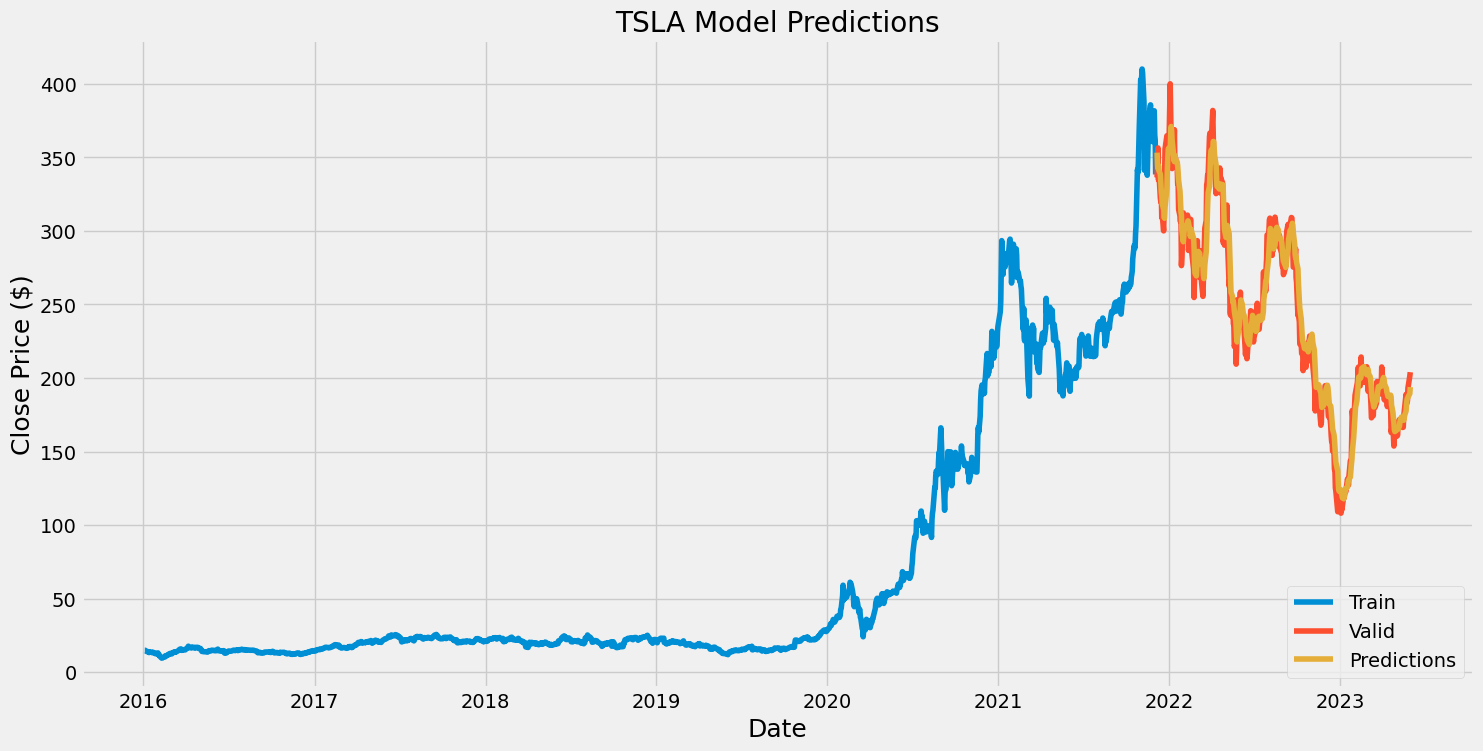

In [99]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid["Predictions"] = predictions
#Visualise
plt.figure(figsize=(16,8))
plt.title('TSLA Model Predictions')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Valid', 'Predictions'], loc='lower right')
plt.show()

In [100]:
#Show actual price and predicted prices
valid

,Close,Predictions
Date,,
2021-12-06,336.336670,353.154755
2021-12-07,350.583344,344.336060
2021-12-08,356.320007,342.254486
2021-12-09,334.600006,344.231293
2021-12-10,339.010010,340.843414
...,...,...
2023-05-24,182.899994,185.220413
2023-05-25,184.470001,186.305374
2023-05-26,193.169998,186.872513


In [101]:
#Get quote
tsla_quote = yf.download('TSLA', start="2012-01-01", end="2022-08-17")
#Create new df
temp_df = tsla_quote.filter(['Close'])
#Get last 60 days
last_60_days = temp_df[-60:].values
#Scale the data
last_60_days_scaled = scaler.transform(last_60_days)
#Create empty list
X_test = []
#Append values to list
X_test.append(last_60_days_scaled)
#Convert X_test data to a numpy array
X_test = np.asarray(X_test)
#Reshape data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[*********************100%***********************]  1 of 1 completed
1/1 [==============================] - 0s 14ms/step
[[299.9428]]


In [102]:
#Get quote
tsla_quote2 = yf.download('TSLA', start="2022-08-17", end="2022-08-18")
print(tsla_quote2)

[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close   
Date                                                                     
2022-08-17  303.396667  309.656677  300.033325  303.996674  303.996674  \

              Volume  
Date                  
2022-08-17  68766000  


In [ ]:
#Model doesn't have great accuracy initially, RMSE score was 4.[...]
#Second retraining of model, RMSE = 7.[...]
#Third retraining of model, RMSE = 2.0914368003047503